# Task 1: Downloaded the datasets

In [71]:
#importing the required module

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 2: Load the datasets

In [72]:
#importing the required csv file

df=pd.read_csv('Churn_Modelling.csv')
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

# Task 3: Visualization
 - univarient
   - barchart,histogram,pie chart,frequency polygram
 - Bivarient 
     - scatterplot,Linear correleation
 - multiVarient

(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

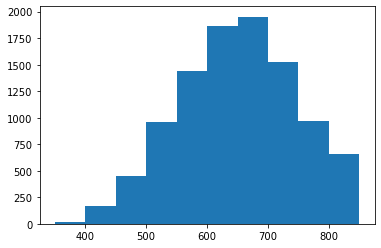

In [73]:
plt.hist(x='CreditScore',data=df)

<BarContainer object of 10000 artists>

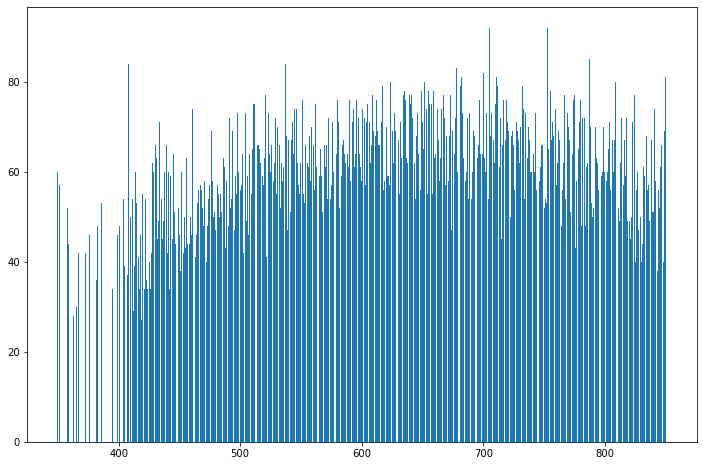

In [74]:
fig=plt.figure(figsize=(12,8))
plt.bar(x='CreditScore',height='Age',data=df)

<AxesSubplot:xlabel='CreditScore', ylabel='Age'>

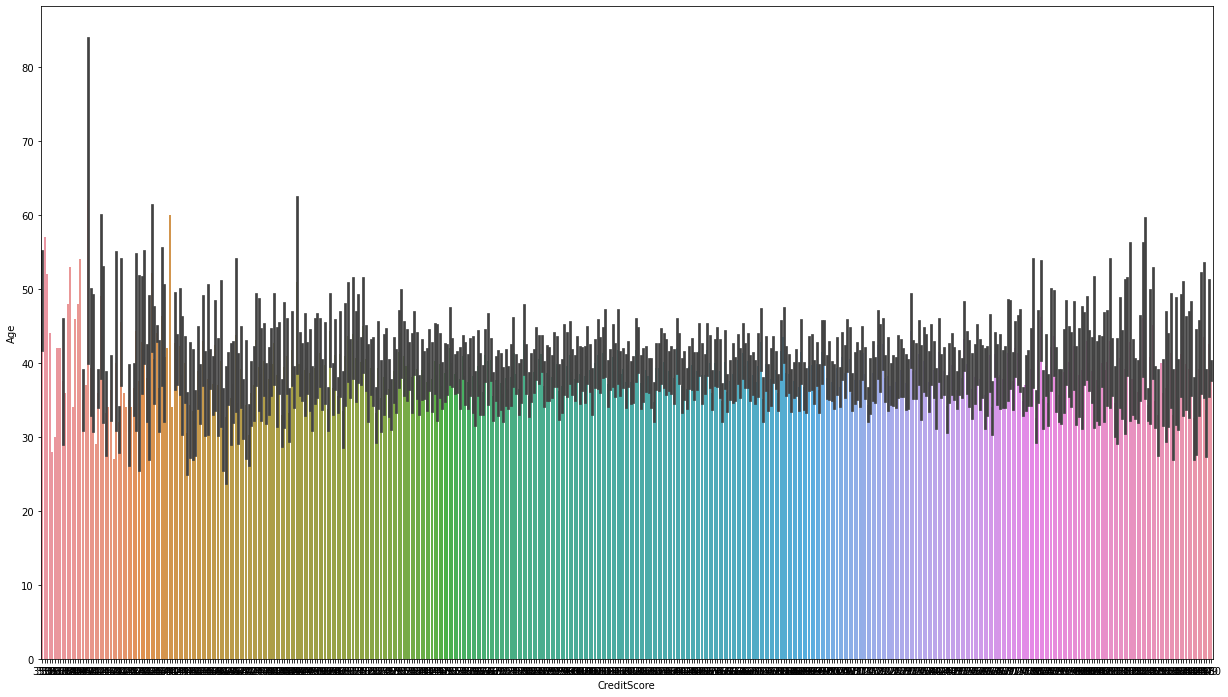

In [75]:
fig=plt.figure(figsize=(21,12))
sns.barplot(x='CreditScore',y='Age',data=df)

ScatterPlot


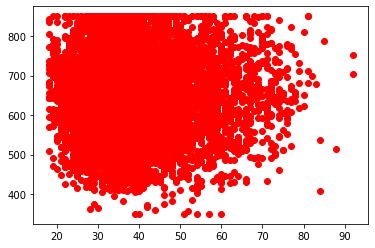

In [76]:
print("ScatterPlot")
plt.scatter(x=df['Age'],y=df['CreditScore'],color="Red")


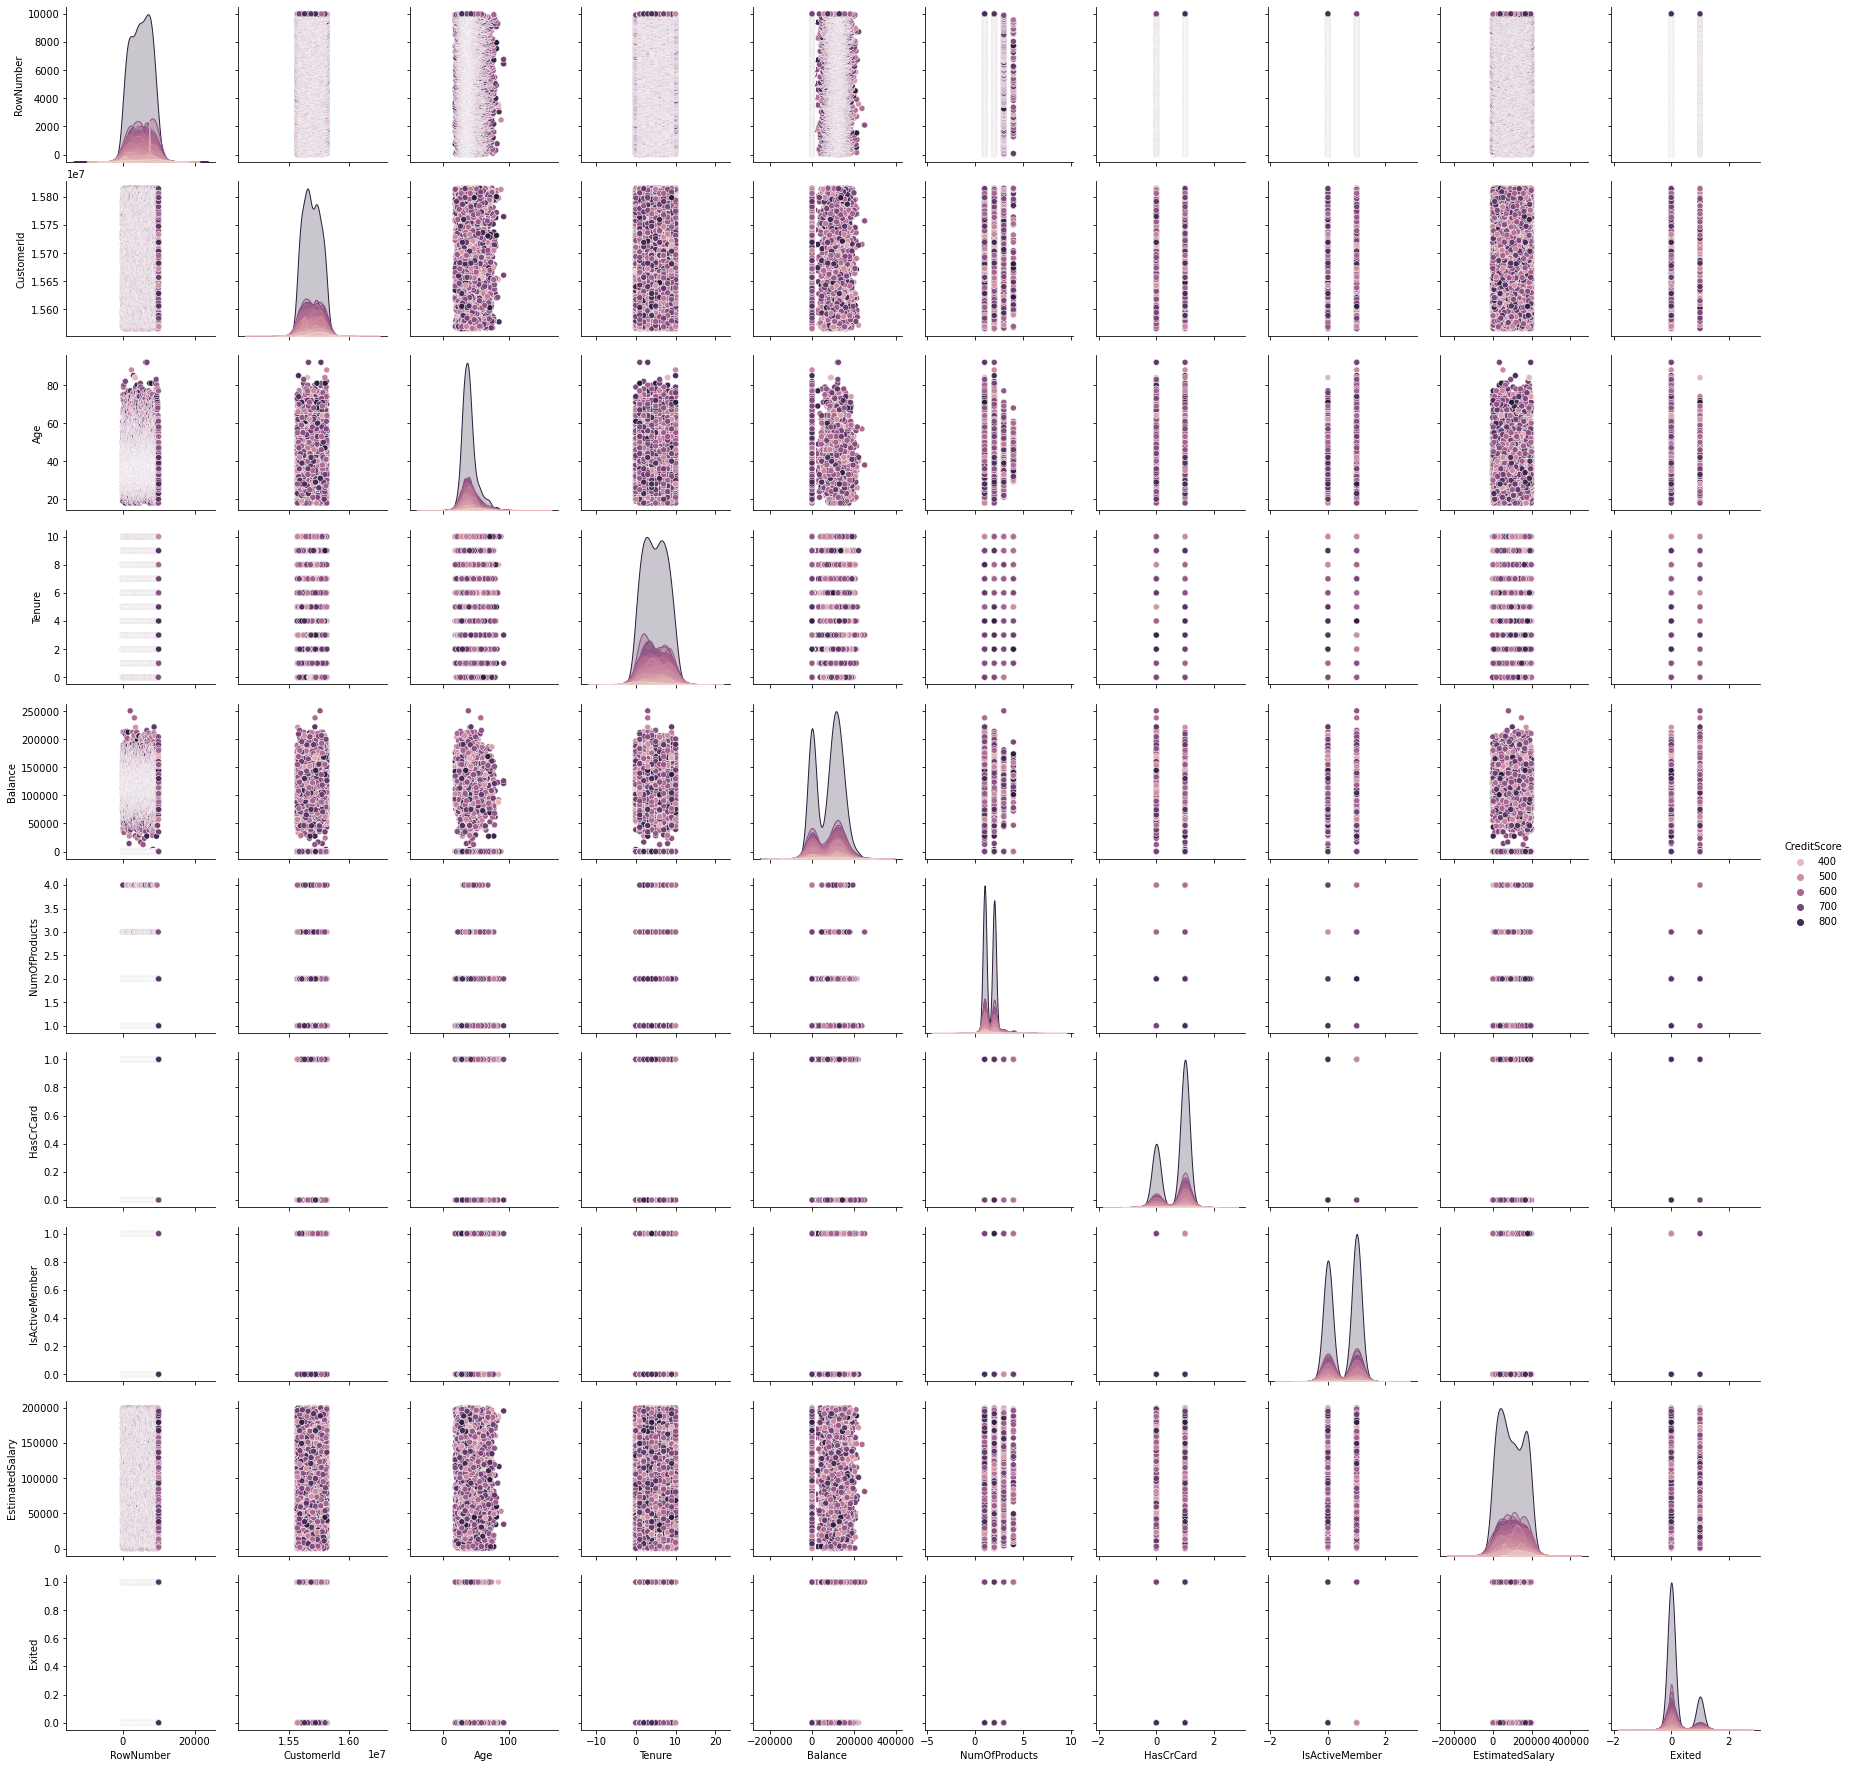

In [77]:
#multivarient
#pairplot
sns.pairplot(df,hue="CreditScore")

<AxesSubplot:>

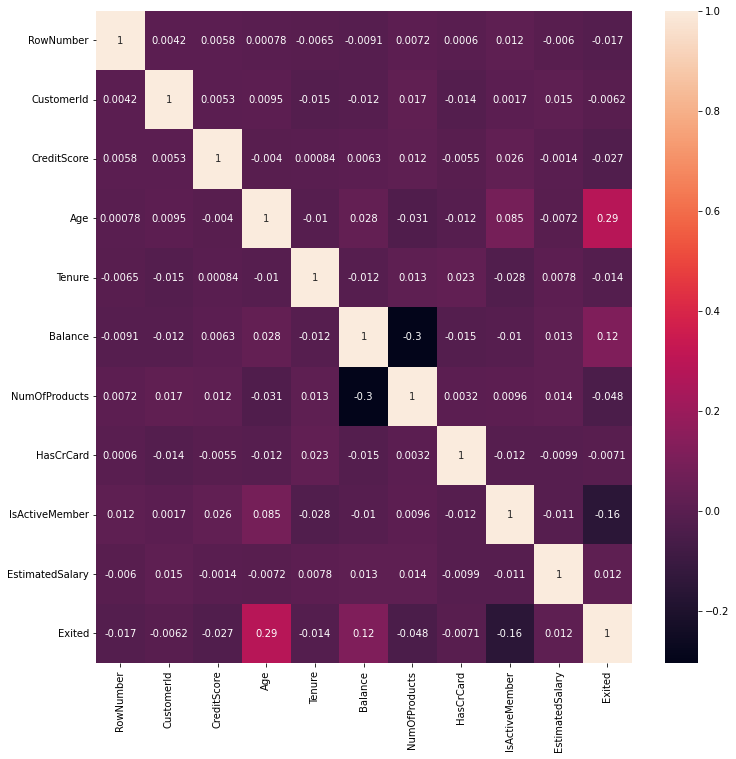

In [78]:
df.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True)

# Task 4: Perform descriptive statistics on the dataset  

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# Task 5: Handle the Missing values

In [80]:
missing_values=df.isna().values.sum()
if(missing_values == 0):
    print("NO missing values... ",missing_values)
else:
    print("Missing values found ... ",missing_values)

NO missing values...  0


# Task 6: Find the outliers and replace the outliers

/home/tirumal/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

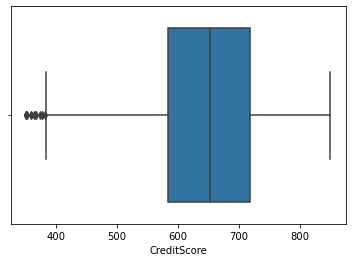

In [81]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)
df.head()

sns.boxplot(df['CreditScore'])

In [82]:
#replacing the outliers
median=df['CreditScore'].median()
df['CreditScore']=df['CreditScore'].mask(df['CreditScore']<400,median)

/home/tirumal/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

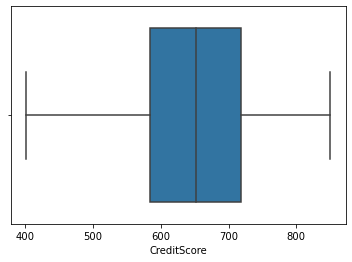

In [83]:
sns.boxplot(df['CreditScore'])

# Task 7: Check for Categorical columns and perform encoding.

In [84]:
df.tail() #surname,geography,gender
df['Geography'].replace({'France':0,'Spain':1,'Germany':3},inplace=True)
df['Gender'].replace({'Female':0,'Male':1},inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42,2,0.00,1,1,1,101348.88,1
1,608.0,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502.0,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699.0,0,0,39,1,0.00,2,0,0,93826.63,0
4,850.0,1,0,43,2,125510.82,1,1,1,79084.10,0


# Task 8 : Split the data into dependent and independent variables.

In [85]:
#y= df.iloc[: , [0,2,4]].values
#independent variables
idv=df.iloc[:, :-1]
#dependent variables
dv=df.iloc[:, -1]


In [86]:
idv.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42,2,0.00,1,1,1,101348.88
1,608.0,1,0,41,1,83807.86,1,0,1,112542.58
2,502.0,0,0,42,8,159660.80,3,1,0,113931.57
3,699.0,0,0,39,1,0.00,2,0,0,93826.63
4,850.0,1,0,43,2,125510.82,1,1,1,79084.10


In [87]:
dv.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Task 9: Scale the independent variables

In [88]:
names=idv.columns
names

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [89]:
from sklearn.preprocessing import scale

scaling=scale(idv)
scaling=pd.DataFrame(scaling,columns=names)
scaling

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.334564,-0.815465,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.449322,-0.000326,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.555170,-0.815465,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.500038,-0.815465,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.075350,-0.000326,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.251181,-0.815465,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.409114,-0.815465,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604364,-0.815465,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.261613,1.629952,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


# Task 10: Split the data into training and testing

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(idv,dv,test_size=0.2)

x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9551,694.0,3,1,31,4,141989.27,2,1,0,26116.82
5879,683.0,0,1,41,6,95696.52,2,1,1,184366.14
4330,781.0,0,0,19,3,0.00,2,1,1,124297.32
5148,731.0,1,1,70,3,0.00,2,1,1,141180.66
2279,745.0,1,1,34,9,0.00,2,1,0,50046.25
...,...,...,...,...,...,...,...,...,...,...
953,694.0,1,1,39,0,107042.74,1,1,1,102284.20
4106,671.0,1,1,34,10,153360.02,1,1,0,140509.86
773,767.0,0,1,36,3,139180.20,1,0,0,123880.19
8078,576.0,0,0,50,8,0.00,2,1,1,57802.62


In [91]:
y_train

9551    0
5879    0
4330    0
5148    0
2279    0
       ..
953     0
4106    0
773     0
8078    0
6560    0
Name: Exited, Length: 8000, dtype: int64